# Домашнее задание №5

### Задание №1 (1,5 балла)

Создайте два массива: в первом должны быть четные числа от 2 до 12 включительно, а в другом числа 7, 11, 15, 18, 23, 29.

$1.$ Сложите массивы и возведите элементы получившегося массива в квадрат:

In [2]:
import numpy as np
a = np.array([2,4,6,10,12])
b = np.array([7,11,15,18,23,29])
print('Массив a:', a)
print ('Массив b:', b)

Массив a: [ 2  4  6 10 12]
Массив b: [ 7 11 15 18 23 29]


$2.$ Выведите все элементы из первого массива, которые стоят на тех местах, где элементы второго массива больше 12 и дают остаток 3 при делении на 5.

In [3]:
a = np.array([2, 4, 6, 8, 10, 12])
b = np.array([7, 11, 15, 18, 23, 29])
array1 = [2, 4, 6, 8, 10, 12]
array2 = [7, 11, 15, 18, 23, 29]
for i in range(len(array2)):
    if array2[i] > 12 and array2[i] % 5 == 3:
        print(array1[i])

8
10


*3.* Для первого массива найдите остатки от деления на 2, а для второго --- на 3. Для каждого получившегося массива выведите его уникальные значения (см. семинар).

In [6]:
print("Элементы первого массива делятся на 4, элементы второго массива меньше 14:",(a % 4 == 0) & (b < 14))

Элементы первого массива делятся на 4, элементы второго массива меньше 14: [False  True False False False False]


Задание №2 (2 балла)

In [ ]:
1. Найдите интересный для вас датасет. Например, можно выбрать датасет тут. http://data.un.org/Explorer.aspx (выбираете датасет, жмете на view data, потом download, выбирайте csv формат)
2. Рассчитайте подходящие описательные статистики для признаков объектов в выбранном датасете
3. Проанализируйте и прокомментируйте содержательно получившиеся результаты
4. Все комментарии оформляйте строго в ячейках формата markdown

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("country_age.csv")
numeric_stats = data[["unemployment", "unemployment_rate"]].describe()
categorical_stats = data[["country", "seasonality", "age_group", "month"]].describe()
print("Описательные статистики для числовых признаков:")
print(numeric_stats)
print("\nОписательные статистики для категориальных признаков:")
print(categorical_stats)

In [ ]:
import pandas as pd


Загрузите данные из файла CSV

In [ ]:
data = pd.read_csv("country_age.csv")


Создаем новый столбец 'age_group_18_65', который будет содержать True, если возраст от 18 до 65 лет, иначе False

In [ ]:
data['age_group_18_65'] = (data['age_group'] == 'y18-65')

Группируем данные по странам

In [ ]:
grouped_data = data.groupby('country')

Для каждой страны вычисляем сумму значений столбца 'age_group_18_65' (True считается как 1, False как 0)

In [ ]:
sum_age_18_65 = grouped_data['age_group_18_65'].sum()

Для каждой страны вычисляем общее количество записей (человек) в данной стране

In [ ]:
total_population = grouped_data.size()

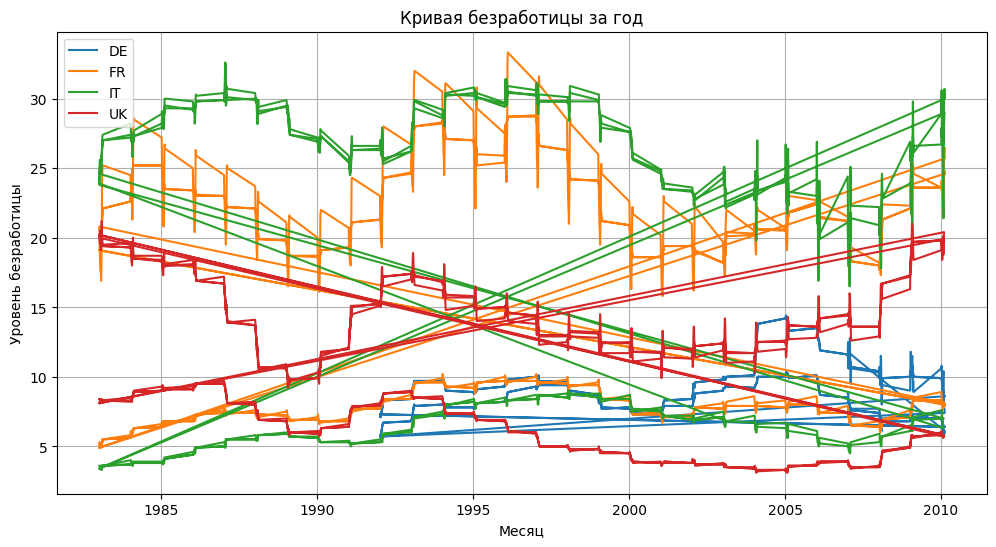

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузите данные из CSV-файла
data = pd.read_csv("country_age.csv")

# Отфильтруйте данные только для выбранных стран
selected_countries = ["de", "fr", "it", "uk"]
filtered_data = data[data['country'].isin(selected_countries)]

# Создайте пустой словарь для хранения данных по странам
country_data = {}

# Разделите данные на группы по странам
for country in selected_countries:
    country_data[country] = filtered_data[filtered_data['country'] == country]

# Постройте кривые безработицы для каждой страны
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_df = country_data[country]
    plt.plot(country_df['month'], country_df['unemployment_rate'], label=country.upper())

# Настройте метки осей и легенду
plt.xlabel('Месяц')
plt.ylabel('Уровень безработицы')
plt.title('Кривая безработицы за год')
plt.legend()

# Отобразите график
plt.grid()
plt.show()